# Preamble

To import the module ```ringity``` please make sure that the folder ```/ringity``` is in the same direcotry as this notebook or alternatively download ringity via ```pip install ringity```.

# Imports

In [1]:
from scipy.spatial.distance import pdist, squareform
from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, sin, tan
from collections import Counter

import os
import numpy as np
import pandas as pd
import networkx as nx
import ringity as rng
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: left;
}
</style>
"""))

# Plot parameters

In [3]:
cemm1 = [0/255,85/255,100/255]
cemm2 = [0/255,140/255,160/255]
cemm3 = [64/255,185/255,212/255]
cemm4 = [212/255,236/255,242/255]

costume = [0/255,9/255,10/255]

sblue = sns.color_palette()[0]
sred = sns.color_palette()[1]
sgreen = sns.color_palette()[2]
sblack = sns.color_palette('bright')[7]
sblack2 = sns.color_palette('dark')[7]

In [4]:
node_col = cemm1
edge_col = cemm2

def plot_nx(G, 
            pos=None, 
            ax=None,
            node_colors = None,
            node_alpha  = 0.3, 
            edge_colors = None,
            edge_alpha  = 0.2,
            **kwargs):

    if pos is None:
        pos = nx.spring_layout(G)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8));
        fig.patch.set_alpha(0)
    if node_colors is None:
        node_colors = [node_col for v in G.nodes]
    if edge_colors is None:
        edge_colors = [edge_col for u,v in G.edges]
    nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=node_alpha, ax=ax, node_color=node_colors, node_size=15, linewidths=1)
    edges = nx.draw_networkx_edges(G, pos=pos, alpha=edge_alpha, ax=ax, edge_color=edge_colors)
    ax.axis('off');
    
def plot_dgm(dgm, ax=None, **kwargs):
    x,y = zip(*[(k.birth,k.death) for k in dgm])
    d = max(y)

    if ax is None:
        fig, ax = plt.subplots()
        fig.patch.set_alpha(0)

    ax.patch.set_alpha(0)
    
    hw = 0.025 # head width of the arrow
    
    ax.set_xlim([-hw, d*1.1])
    ax.set_ylim([-hw, d*1.1])
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['left'].set_color(sblack2)
    
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines['bottom'].set_color(sblack2)

    ax.plot(x, y, '*', markersize=5, color = cemm2);
    ax.plot([0,d],[0,d], color= [c/2 for c in cemm1], linewidth=1, linestyle='dashed');
    

def plot_bar(dgm, ax=None, cap=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)
    else:
        ax.patch.set_alpha(0)
    if cap is not None:
        for i in range(cap): dgm.append((0,0))
    bar = list(dgm.sequence)[:cap]
    ax.bar(range(len(bar)), bar, color=sblack);
    
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['left'].set_color(sblack2)
    
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines['bottom'].set_color(sblack2)
    
    ax.tick_params(axis='both', which='major', labelsize=24)

# Geometric networks

In [5]:
seed = 11092018

## Annulus

In [6]:
# functions needed
@np.vectorize
def half_circ(x, r=1):
    return np.sqrt(r**2 - x**2)

def annulus(N, 
            r = 1, 
            seed = None):
    """ Outside radius is taken to be 1"""
    
    np.random.seed(seed=seed)
    u,v = np.random.uniform(0,1,[2,N])
    
    phi = 2*np.pi*u
    r = np.sqrt((1-r**2)*v + r**2)
    
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    
    return x,y

In [7]:
# sample preprocessing
N = 200
r = 0.5

pts = annulus(N=N, r=r, seed=seed)

x_in  = np.linspace(-r,r, 101)
x1 = np.stack((x_in, -x_in)).flatten()
y1 = np.stack((half_circ(x_in, r),-half_circ(x_in, r))).flatten()

x_out = np.linspace(-1,1, 101)
x2 = np.stack((x_out,-x_out)).flatten()
y2 = np.stack((half_circ(x_out),-half_circ(x_out))).flatten()

x_left  = np.linspace(-1,-r, 101)
x_mid   = np.linspace(-r, r, 101)
x_right = np.linspace( r, 1, 101)

phi = np.linspace(-pi,pi,101)
x = (r+0.01)*cos(phi)
y = (r+0.01)*sin(phi)

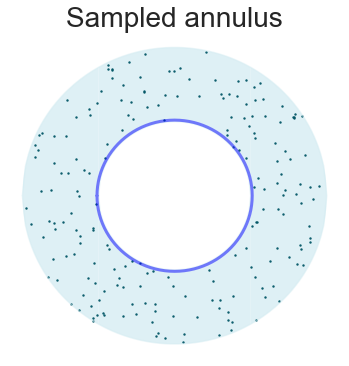

In [8]:
# sampling visual
geo_fig, ax = plt.subplots(figsize=(6,6));
ax.axis('off');

ax.plot(pts[0], pts[1], 'o', markersize=1.5, color=cemm1, alpha=0.8);

ax.plot(x1, y1, color=cemm4, alpha=0.5);
ax.plot(x2, y2, color=cemm4, alpha=0.5);
ax.plot(x, y, color='blue', alpha=0.5, linewidth=3);

ax.set_title('Sampled annulus', fontsize=28);

ax.fill_between(x_left, -half_circ(x_left)  , half_circ(x_left),  alpha=0.75, facecolor=cemm4, edgecolor="none");
ax.fill_between(x_mid,   half_circ(x_mid, r), half_circ(x_mid),   alpha=0.75, facecolor=cemm4, edgecolor="none");
ax.fill_between(x_mid,  -half_circ(x_mid, r),-half_circ(x_mid),   alpha=0.75, facecolor=cemm4, edgecolor="none");
ax.fill_between(x_right, half_circ(x_right) ,-half_circ(x_right), alpha=0.75, facecolor=cemm4, edgecolor="none");

In [9]:
# network preprocessing
d = 0.5

D = squareform(pdist(np.array(pts).T))
A = np.where(np.abs(D)>d,0,1)
np.fill_diagonal(A,0)
G = nx.from_numpy_array(A)
    
pos = nx.spring_layout(G)

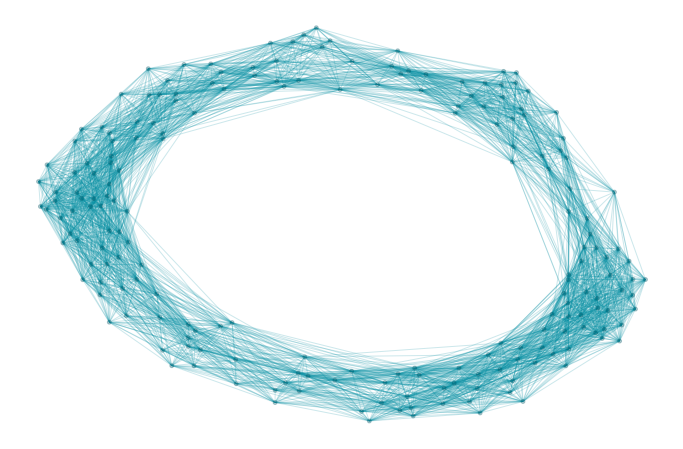

In [10]:
# network visuals
plot_nx(G, pos=pos)

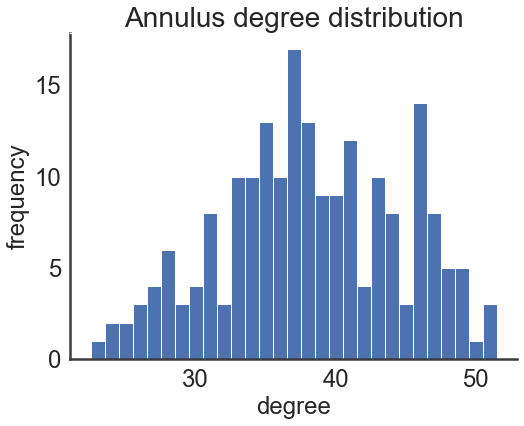

In [11]:
degree_sequence = sorted([d for n, d in G.degree()])
degreeCount = Counter(degree_sequence)
degs, cnts = zip(*degreeCount.items())

deg_fig, ax = plt.subplots(figsize=(8,6))
deg_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.bar(degs, cnts, width=1, color=sblue)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=24)
ax.set_title('Annulus degree distribution', fontsize=28);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

In [29]:
# calclulate diagrams
dgm   = rng.diagram(D, distance_matrix=True)
dgm_d = rng.diagram(G)

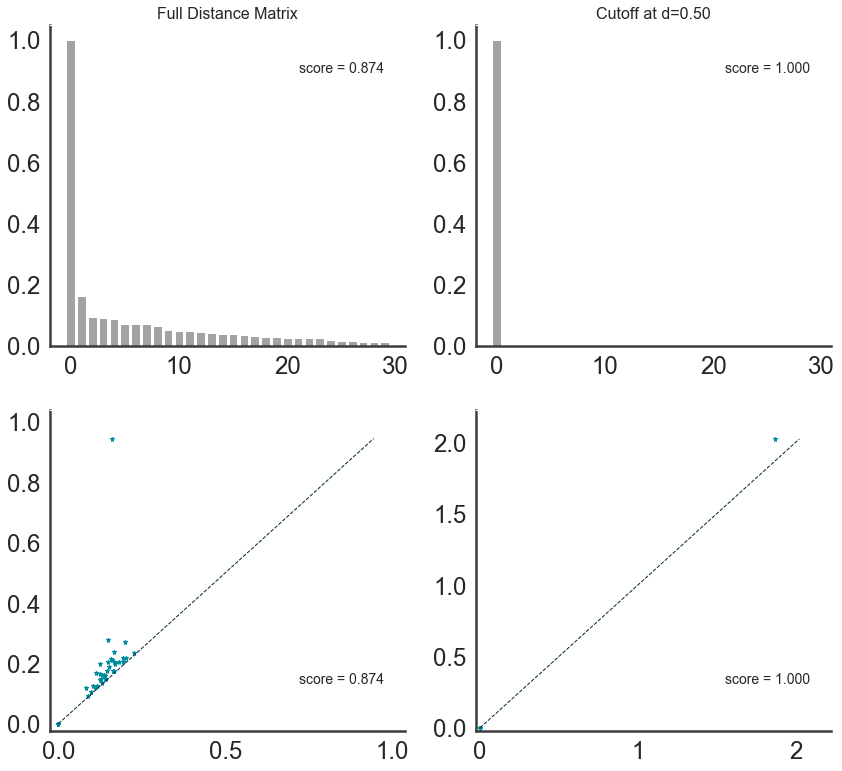

In [30]:
# persistence visuals
fig, axes = plt.subplots(2, 2, figsize=(14,13))

axes[0,0].set_title('Full Distance Matrix', fontsize=16)
axes[0,1].set_title(f'Cutoff at d={d:.2f}', fontsize=16)

plot_bar(dgm,   ax=axes[0,0], cap=30)
plot_bar(dgm_d, ax=axes[0,1], cap=30)
plot_dgm(dgm,   ax=axes[1,0])
plot_dgm(dgm_d, ax=axes[1,1])

axes[0,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[0,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[1,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);
axes[1,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);

## Cylinder

In [31]:
# functions needed
def cylinder(N,
             height = 1,
             seed = None):
    
    np.random.seed(seed=seed)
    u,v = np.random.uniform(0,1,[2,N])
    
    phi = 2*np.pi*u
    
    x = np.cos(phi)
    y = np.sin(phi)
    z = np.random.uniform(0,height,N)
    
    return x,y,z

In [32]:
# sample preprocessing
N = 500
h = 3

pts = cylinder(N=N, height=h, seed=seed)

phi    = np.linspace(0, 2*np.pi, 101)
height = np.linspace(0, h, 101)

x = np.outer(np.cos(phi), np.ones(101))
y = np.outer(np.sin(phi), np.ones(101))
z = np.outer(np.ones(101), height)

phi = np.linspace(0,2*pi,101)
x1 = cos(phi)
y1 = sin(phi)
z1 = h/2 * np.ones_like(phi)

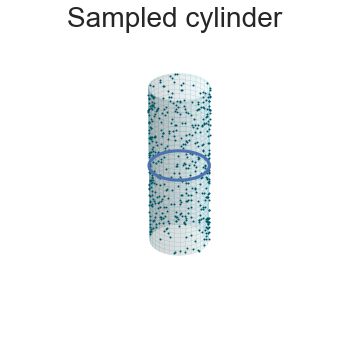

In [33]:
# sampling visual
geo_fig = plt.figure(figsize=(6,6))
ax  = geo_fig.gca(projection='3d')
ax.set_xlim(-h,h)
ax.set_ylim(-h,h)
ax.set_zlim(0,h)
ax.set_facecolor('white')
ax.axis('off')

ax.set_title('Sampled cylinder', fontsize=28);

ax.plot(pts[0],pts[1], pts[2], 'o', markersize=1, color=cemm1);
ax.plot_surface(x, y, z, color=cemm4, alpha=0.25, linewidth=0.1, edgecolors=cemm2 + [0.5]);
ax.plot(x1, y1, z1, 'b', linewidth=3);

In [34]:
# network preprocessing
d = 0.75

D = squareform(pdist(np.array(pts).T))
A = np.where(np.abs(D)>d,0,1)
np.fill_diagonal(A,0)
G = nx.from_numpy_array(A)
    
pos = nx.spring_layout(G)

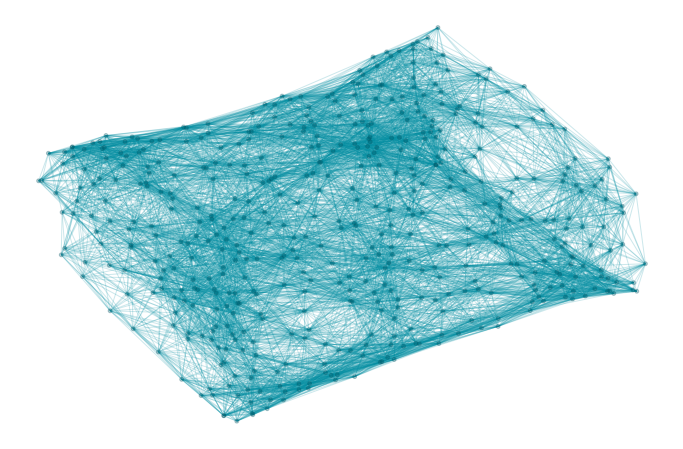

In [35]:
# network visuals
plot_nx(G, pos=pos)

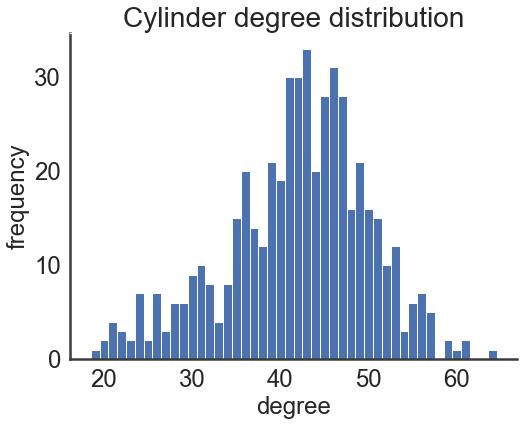

In [36]:
degree_sequence = sorted([d for n, d in G.degree()])
degreeCount = Counter(degree_sequence)
degs, cnts = zip(*degreeCount.items())

deg_fig, ax = plt.subplots(figsize=(8,6))
deg_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.bar(degs, cnts, width=1, color=sblue)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=24)
ax.set_title('Cylinder degree distribution', fontsize=28);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

In [37]:
# calclulate diagrams
dgm   = rng.diagram(D, distance_matrix=True)
dgm_d = rng.diagram(G)

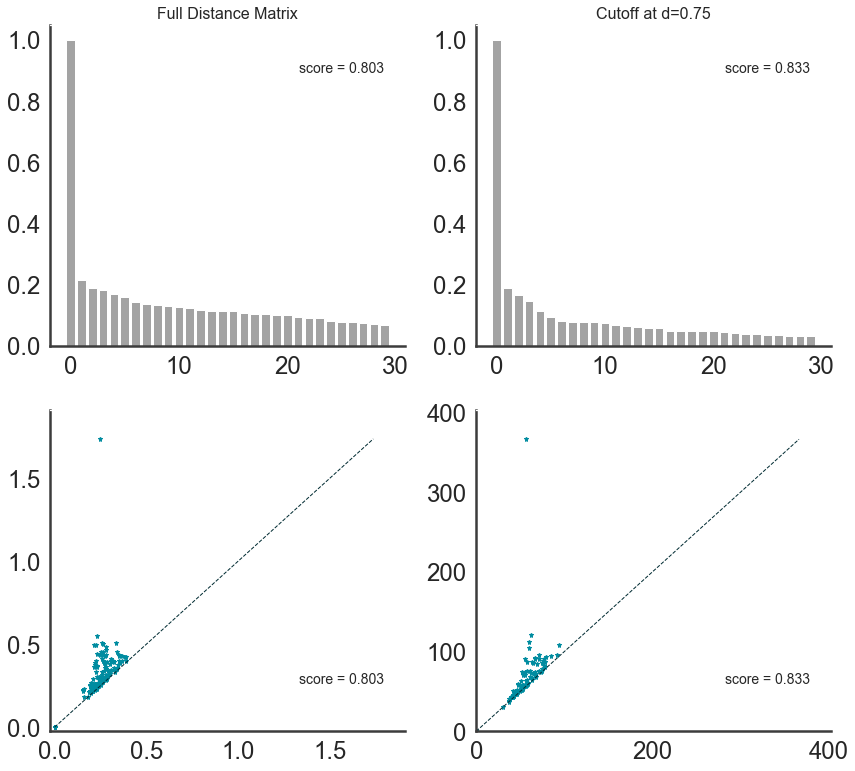

In [38]:
# persistence visuals
fig, axes = plt.subplots(2, 2, figsize=(14,13))

axes[0,0].set_title('Full Distance Matrix', fontsize=16)
axes[0,1].set_title(f'Cutoff at d={d:.2f}', fontsize=16)

plot_bar(dgm,   ax=axes[0,0], cap=30)
plot_bar(dgm_d, ax=axes[0,1], cap=30)
plot_dgm(dgm,   ax=axes[1,0])
plot_dgm(dgm_d, ax=axes[1,1])

axes[0,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[0,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[1,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);
axes[1,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);

## Torus

In [39]:
# functions needed
def torus(N = 100,
        r  = 1,
        seed = None):
    "The circle of revolution is assumed to be 1"
    
    np.random.seed(seed=seed)
    u,v = np.random.uniform(0,2*np.pi,[2,N])
    
    x = (1 + r*np.cos(v))*np.cos(u)
    y = (1 + r*np.cos(v))*np.sin(u)
    z = r*np.sin(v)
    
    return x,y,z

In [40]:
# sample preprocessing
N  = 750
r = 1/2

pts = torus(N=N, r=r, seed=seed)

u = np.linspace(0,2*np.pi,101)
v = np.linspace(0,2*np.pi,101)

x = np.outer(1 + r*np.cos(v), np.cos(u))
y = np.outer(1 + r*np.cos(v), np.sin(u))
z = np.outer(np.sin(v), r*np.ones(101))

u11 = pi
v11 = np.linspace(0.5,pi+0.7,101)
x11 = cos(v11)*(1 + r*cos(u11))
y11 = sin(v11)*(1 + r*cos(u11))
z11 = r*np.sin(u11)

u12 = u11
v12 = np.linspace(-pi, pi, 101)
x12 = cos(v12)*(1 + r*cos(u12))
y12 = sin(v12)*(1 + r*cos(u12))
z12 = r*np.sin(u12)

u2 = np.linspace(0,2*pi,101)
v2 = -0.1
x2 = cos(v2)*(1 + r*cos(u2))
y2 = sin(v2)*(1 + r*cos(u2))
z2 = r*np.sin(u2)

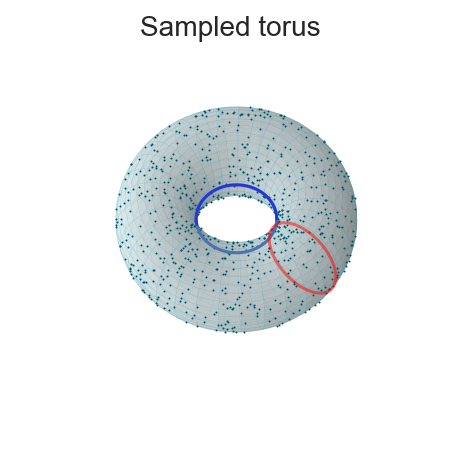

In [41]:
# sampling visual
geo_fig = plt.figure(figsize=(8,8))
ax = plt.gca(projection='3d')
ax.set_xlim(-1-r,1+r)
ax.set_ylim(-1-r,1+r)
ax.set_zlim(-1,1)
ax.set_facecolor('white')
ax.axis('off')


ax.set_title('Sampled torus', fontsize=28);

ax.plot_surface(x, y, z, color=cemm4, alpha=0.4, linewidth=0.1, edgecolors=cemm2 + [0.5])
ax.plot(pts[0],pts[1], pts[2], 'ko', markersize=1, color=cemm1);
# ax.plot(x12, y12, z12, 'b--', linewidth=3, alpha = 1);
ax.plot(x12, y12, z12, 'b', linewidth=3, alpha = 1);
ax.plot(x11, y11, z11, 'blue', linewidth=3, alpha = 0.5);
ax.plot(x2, y2, z2, 'red' , linewidth=3, alpha = 0.5);

ax.view_init(elev=60)

In [42]:
# network preprocessing
d = 0.6

D = squareform(pdist(np.array(pts).T))
A = np.where(np.abs(D)>d,0,1)
np.fill_diagonal(A,0)
G = nx.from_numpy_array(A)
    
pos = nx.spring_layout(G)

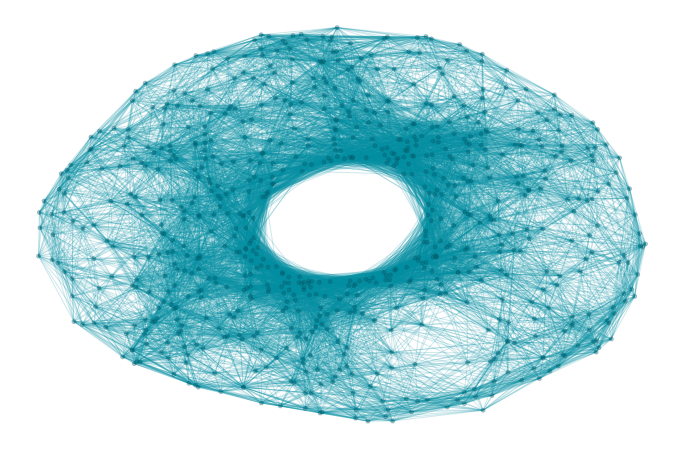

In [43]:
# network visuals
plot_nx(G, pos=pos)

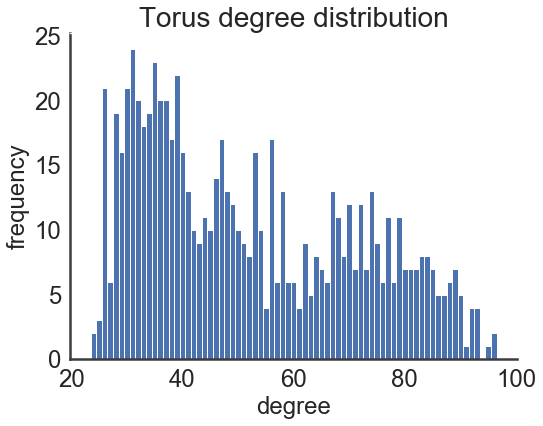

In [44]:
degree_sequence = sorted([d for n, d in G.degree()])
degreeCount = Counter(degree_sequence)
degs, cnts = zip(*degreeCount.items())

deg_fig, ax = plt.subplots(figsize=(8,6))
deg_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.bar(degs, cnts, width=1, color=sblue)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=24)
ax.set_title('Torus degree distribution', fontsize=28);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

In [45]:
# calclulate diagrams
dgm   = rng.diagram(D, distance_matrix=True)
dgm_d = rng.diagram(G)

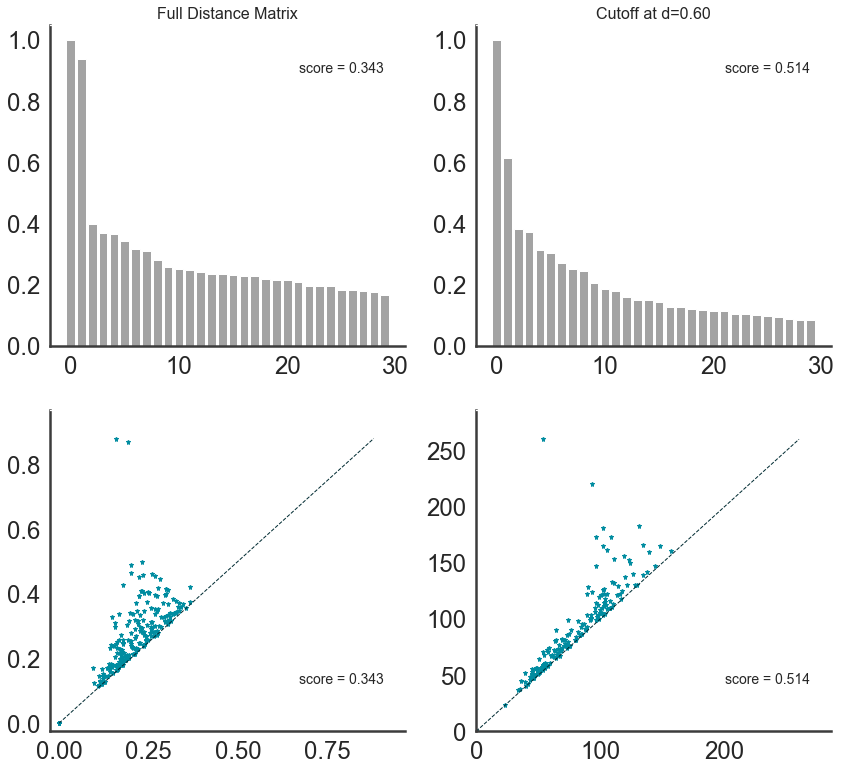

In [46]:
# persistence visuals
fig, axes = plt.subplots(2, 2, figsize=(14,13))

axes[0,0].set_title('Full Distance Matrix', fontsize=16)
axes[0,1].set_title(f'Cutoff at d={d:.2f}', fontsize=16)

plot_bar(dgm,   ax=axes[0,0], cap=30)
plot_bar(dgm_d, ax=axes[0,1], cap=30)
plot_dgm(dgm,   ax=axes[1,0])
plot_dgm(dgm_d, ax=axes[1,1])

axes[0,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[0,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=14);
axes[1,0].annotate(f'score = {dgm.score  :.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);
axes[1,1].annotate(f'score = {dgm_d.score:.3f}', xy=(0.7, 0.15), xycoords='axes fraction', fontsize=14);

# Model networks

## Watts-Strogatz (individuals)

In [47]:
# Set parameters
N = 1000
k = 10

p_list = [0, 0.01, 0.1, 1]
G_list = [nx.watts_strogatz_graph(N,k,p) for p in p_list]

pos = {n:(np.cos(t), np.sin(t)) for (n,t) in enumerate(np.linspace(0,2*np.pi,N+1))}

In [48]:
# get those data!
path = f'data/toy_networks/watts_strogatz/dgms/N{N}/k{k}'
dgm_dict = {p:[] for p in p_list}

for p in p_list:
    for file in os.listdir(f'{path}/p{p:.6f}'):
        if not file.endswith('.csv'):
            continue
        dgm = rng.load_dgm(f'{path}/p{p:.6f}/{file}')
        for i in range(50): dgm.append((0,0))
        dgm_dict[p].append(rng.normalize(dgm))
        
dgm_list = [np.mean(dgm_dict[p]) for p in p_list]

FileNotFoundError: [Errno 2] No such file or directory: 'data/toy_networks/watts_strogatz/dgms/N1000/k10/p0.000000'

In [49]:
# somehow for p=0 things don't work properly...
file = os.listdir(f'{path}/p{0:.6f}')[0]
dgm = rng.load_dgm(f'{path}/p{0:.6f}/{file}')
dgm_list[0] = rng.normalize(dgm)

FileNotFoundError: [Errno 2] No such file or directory: 'data/toy_networks/watts_strogatz/dgms/N1000/k10/p0.000000'

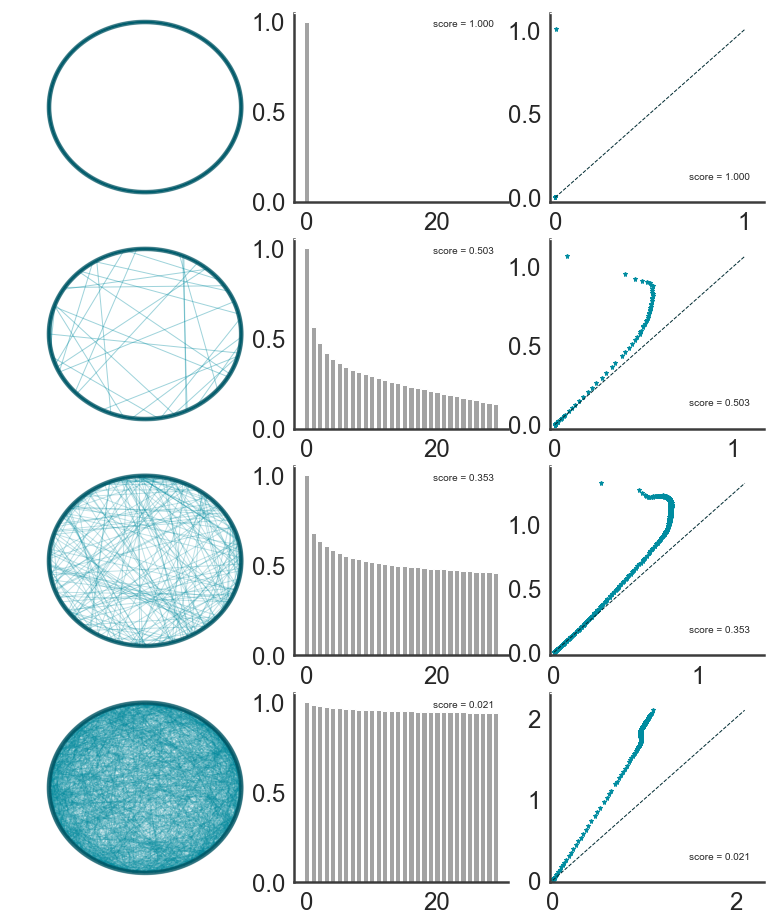

In [237]:
# persistence visuals
fig, axes = plt.subplots(len(p_list), 3, figsize=(13,16))

for i in range(len(p_list)):
    plot_nx(G_list[i], pos=pos, ax=axes[i,0], edge_alpha=(1-i/4)/2)
    plot_bar(dgm_list[i], ax=axes[i,1], cap=30)
    plot_dgm(dgm_list[i], ax=axes[i,2])
    
    axes[i,1].annotate(f'score = {dgm_list[i].GGS:.3f}', xy=(0.65, 0.925), xycoords='axes fraction', fontsize=10);
    axes[i,2].annotate(f'score = {dgm_list[i].GGS:.3f}', xy=(0.65, 0.12), xycoords='axes fraction', fontsize=10);

## Watts-Strogatz (curves)

In [52]:
# Some preprocessing
N = 2**10

k_list = [8, 10, 12]
p_lists = []
score_lists = []

for k in k_list:
    df = pd.read_csv(f'data/toy_networks/watts_strogatz/GGS/N{N}/k{k}/GGS.csv', index_col=0).mean()
    p_lists.append(np.array(df.index.astype(float)))
    score_lists.append(np.array(df))

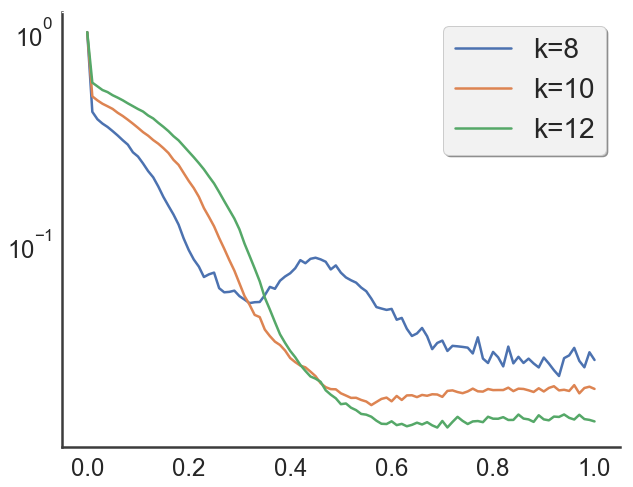

In [120]:
# Aaaand here the visuals
rand_fig, ax = plt.subplots(figsize=(10,8))
rand_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

for i,k in enumerate(k_list):
    ax.semilogy(p_lists[i], score_lists[i], label=f'k={k}', linewidth=2.5)
    
ax.legend(fontsize=28, shadow=True, facecolor=[0.95, 0.95, 0.95, 0])
# ax.set_title(f'Watts-Strogatz scores for N={N}', fontsize=24);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

## Erdos-Renyi (annealing)

In [8]:
# Some preprocessing
N = 2**8
df = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_analysis/GGS/{N}.csv', index_col=0)
df.columns = df.columns.astype(float)

dfa = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_annealing_10000/GGS/{N}.csv', index_col=0)
dfa.columns = dfa.columns.astype(float)

df = df.iloc[:,df.columns<=0.1]

x      = np.array(list(map(float,df.keys())))
y_25   = np.array(df.describe().loc['25%'])
y_mean = np.array(df.describe().loc['mean'])
y_75   = np.array(df.describe().loc['75%'])

xa      = np.array(list(map(float,dfa.keys())))
ya_25   = np.array(dfa.describe().loc['25%'])
ya_mean = np.array(dfa.describe().loc['mean'])
ya_75   = np.array(dfa.describe().loc['75%'])

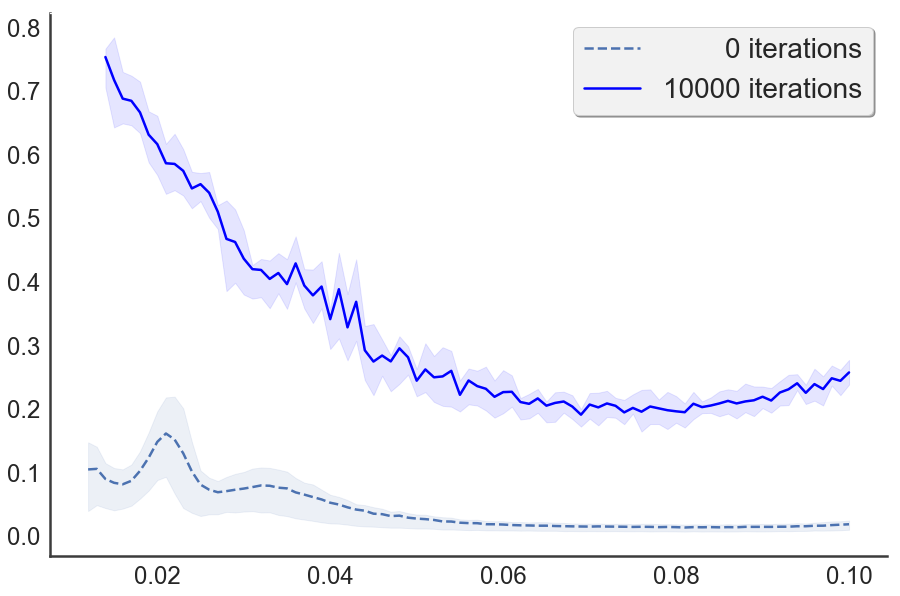

In [9]:
dens_fig, ax = plt.subplots(figsize=(15,10))
dens_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(x, y_mean,'--', label='        0 iterations', color=sblue, linewidth=2.5);
ax.fill_between(x, y_25 , y_75 , alpha=0.1, color=sblue);

ax.plot(xa, ya_mean, color='blue', label='10000 iterations', linewidth=2.5);
ax.fill_between(xa, ya_25 , ya_75 , alpha=0.1, color='blue');

# ax.set_xlabel('density')
# ax.set_ylabel('score')
ax.legend(fontsize=28, shadow=True, facecolor=[0.95, 0.95, 0.95, 0])
# ax.set_title(r'ER$\left(2^8,p\right)$ annealed scores', fontsize=24);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

In [10]:
p = '0.090000'
path = f'data/toy_networks/erdos_renyi/ER_annealing_10000/datas/N{N}/p{p}'
data = np.zeros(10000)

for i, file in enumerate(os.listdir(f'{path}')):
    data += np.genfromtxt(f'{path}/{file}')
data = data/i

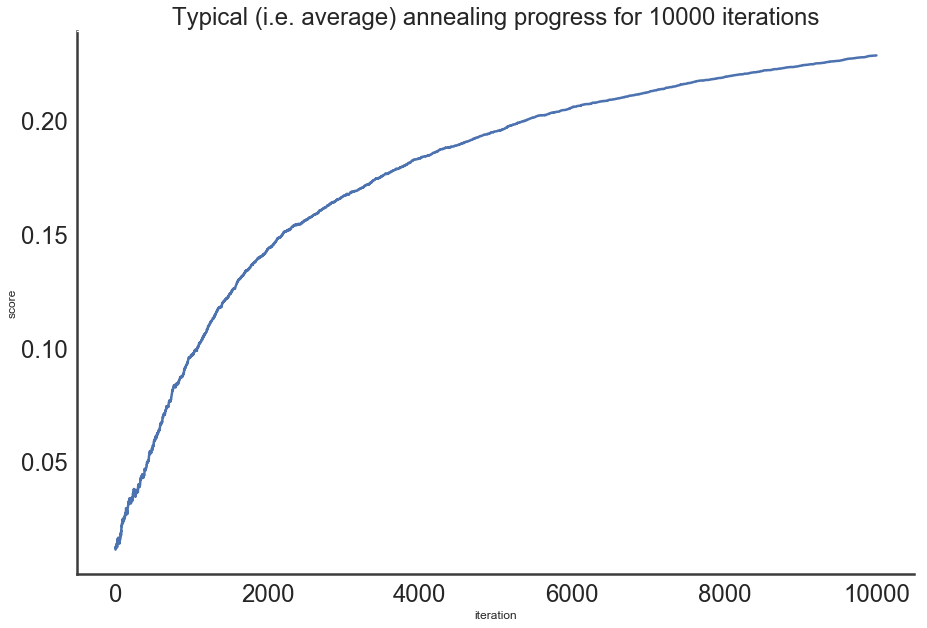

In [11]:
iter_fig, ax = plt.subplots(figsize=(15,10))
iter_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(data, linewidth=2.5);
ax.set_xlabel('iteration')
ax.set_ylabel('score')
ax.set_title('Typical (i.e. average) annealing progress for 10000 iterations', fontsize=24);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

## Erdos_Renyi (density)

In [280]:
N = 2**7
df0 = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_analysis/GGS/{N}.csv', index_col=0)
df0.columns = df0.columns.astype(float)

N = 2**8
df1 = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_analysis/GGS/{N}.csv', index_col=0)
df1.columns = df1.columns.astype(float)

N = 2**9
df2 = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_analysis/GGS/{N}.csv', index_col=0)
df2.columns = df2.columns.astype(float)

N = 2**10
df3 = pd.read_csv(f'data/toy_networks/erdos_renyi/ER_analysis/GGS/{N}.csv', index_col=0)
df3.columns = df3.columns.astype(float)

## Barabasi-Albert (annealing)

In [13]:
N = 2**8

df = pd.read_csv(f'data/toy_networks/barabasi_albert/BA_analysis/GGS/{N}.csv', index_col=0)
df.columns = df.columns.astype(int)

dfa = pd.read_csv(f'data/toy_networks/barabasi_albert/BA_annealing_10000/GGS/{N}.csv', index_col=0)
dfa.columns = dfa.columns.astype(int)

df  = df.iloc[:,df.columns   < 14]
dfa = dfa.iloc[:,dfa.columns < 14]

x      = np.array(list(map(int,df.keys())))
y_25   = np.array(df.describe().loc['25%'])
y_mean = np.array(df.describe().loc['mean'])
y_75   = np.array(df.describe().loc['75%'])

xa      = np.array(list(map(int,dfa.keys())))
ya_25   = np.array(dfa.describe().loc['25%'])
ya_mean = np.array(dfa.describe().loc['mean'])
ya_75   = np.array(dfa.describe().loc['75%'])

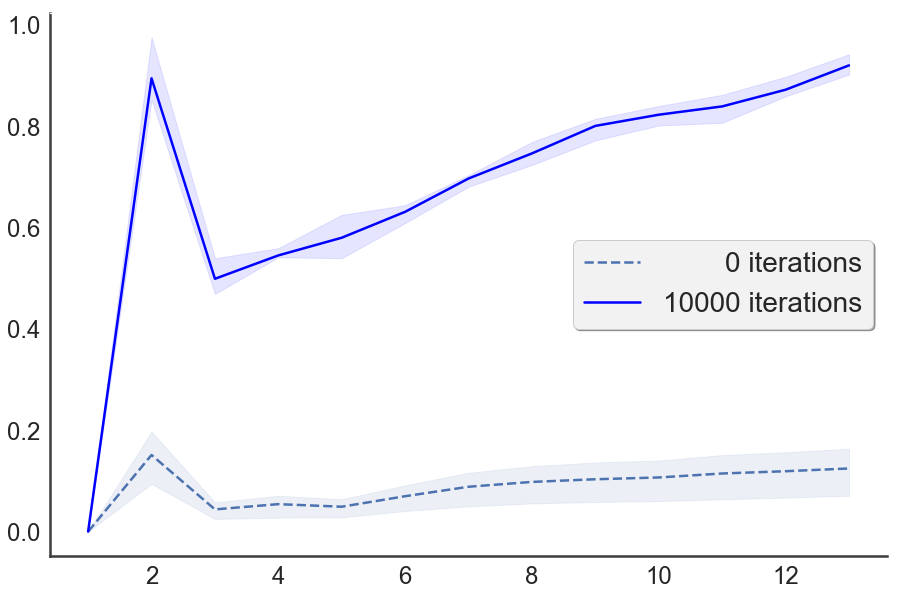

In [14]:
dens_fig, ax = plt.subplots(figsize=(15,10))
dens_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(x, y_mean,'--', label='        0 iterations', color=sblue, linewidth=2.5);
ax.fill_between(x, y_25 , y_75 , alpha=0.1, color=sblue);

ax.plot(xa, ya_mean, color='blue', label='10000 iterations', linewidth=2.5);
ax.fill_between(xa, ya_25 , ya_75 , alpha=0.1, color='blue');

# ax.set_xlabel('m')
# ax.set_ylabel('score')
ax.legend(fontsize=28, shadow=True, facecolor=[0.95, 0.95, 0.95, 0])
# ax.set_title(r'BA$\left(2^8,p\right)$ annealed scores', fontsize=24);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)

In [15]:
m = 4
path = f'data/toy_networks/barabasi_albert/BA_annealing_10000/datas/N{N}/m{m}'
data = np.zeros(10000)

for i, file in enumerate(os.listdir(f'{path}')):
    data += np.genfromtxt(f'{path}/{file}')
data = data/i

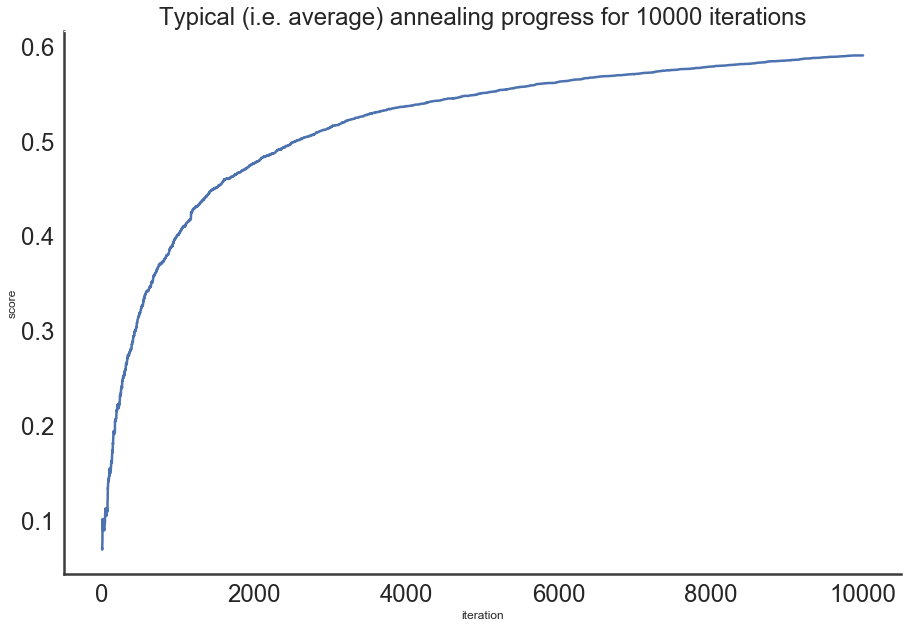

In [16]:
iter_fig, ax = plt.subplots(figsize=(15,10))
iter_fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.plot(data, linewidth=2.5);
ax.set_xlabel('iteration')
ax.set_ylabel('score')
ax.set_title('Typical (i.e. average) annealing progress for 10000 iterations', fontsize=24);

ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color(sblack2)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color(sblack2)